In [14]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
import matplotlib.pyplot as plt

In [15]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [16]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [17]:
model = Sequential([Flatten(input_shape=(32,32,3)),
                    Dense(512, activation='relu'),
                    Dense(256, activation='relu'),
                    Dense(10, activation='softmax')])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(optimizer=SGD(learning_rate=0.01), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(x_train,y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.2500 - loss: 2.0724 - val_accuracy: 0.3302 - val_loss: 1.8665
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.3579 - loss: 1.8280 - val_accuracy: 0.3788 - val_loss: 1.7604
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.3863 - loss: 1.7477 - val_accuracy: 0.3958 - val_loss: 1.7196
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.4073 - loss: 1.6890 - val_accuracy: 0.4095 - val_loss: 1.6803
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.4232 - loss: 1.6546 - val_accuracy: 0.4147 - val_loss: 1.6507
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.4357 - loss: 1.6165 - val_accuracy: 0.4311 - val_loss: 1.6021
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.4424 - loss: 1.5849 - val_accuracy: 0.4453 - val_loss: 1.5886
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.4509 - loss: 1.5650 - 

In [20]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"test loss: {test_loss:.4f}, test accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4714 - loss: 1.5155
test loss: 1.5185, test accuracy: 0.4660


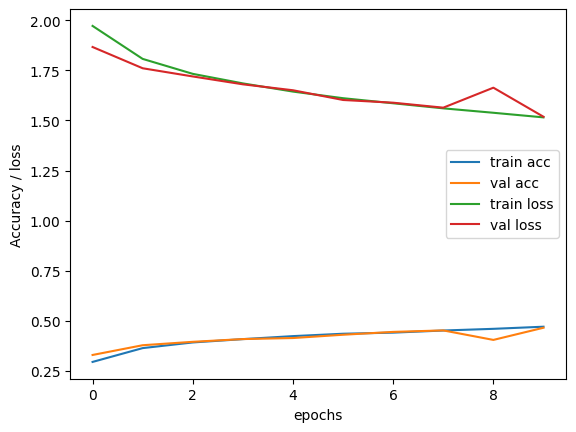

In [21]:
plt.plot(history.history['accuracy'], label = 'train acc')
plt.plot(history.history['val_accuracy'], label = 'val acc')
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.xlabel('epochs')
plt.ylabel('Accuracy / loss')
plt.legend()
plt.show()